In [1]:
import requests
import json
import pandas as pd
import numpy as np
from time import sleep
from datetime import datetime, timezone
from datetime import time



import matplotlib.pyplot as plt
import matplotlib

from utils import get_block_number_from_timestamp


# Timestamp - block

Load previously fetched data

In [2]:
# df_timestamp_block_origin = pd.read_csv('./daily_data/timestamp_block.csv')

# print("Origin date fetch (UTC):", datetime.utcfromtimestamp(df_timestamp_block_origin['timestamp'].iloc[-1]))

Origin date fetch (UTC): 2022-08-08 00:00:00


Query new timestamp-block

In [3]:
# origin_timestamp = df_timestamp_block_origin['timestamp'].iloc[-1]
# dt = datetime.now()
# last_timestamp = int(datetime(
#     year=dt.year, month=dt.month, day=dt.day, 
#     hour=0, minute=0, second=0, microsecond=0, 
#     tzinfo=timezone.utc
# ).timestamp())

# interval = 86400 # 1 day
# df_timestamp_block = df_timestamp_block_origin

# for timestamp in range(origin_timestamp, last_timestamp+1, interval):
#     block = get_block_number_from_timestamp(timestamp)
#     values = [{
#         "timestamp": timestamp,
#         "block": block
#     }]
#     df_timestamp_block = df_timestamp_block.append(values)
#     sleep(0.25)

# # not sure why got many duplicated, just use drop
# df_timestamp_block.drop_duplicates(keep='first', inplace=True) 

# # save
# df_timestamp_block.reset_index(inplace = True, drop = True)
# df_timestamp_block.to_csv('./daily_data/timestamp_block.csv', index=False)

# print("Last date fetch (UTC):", datetime.utcfromtimestamp(df_timestamp_block['timestamp'].iloc[-1]))


Last date fetch (UTC): 2022-08-09 00:00:00


# Global statistics

Load previously fetched data

In [3]:
df_global_statistics =  pd.read_csv('./daily_data/old_subgraph/global_statistics.csv')

Query new global statistics data

In [5]:
# base_url = "https://v4.subgraph.polygon.oceanprotocol.com"
# route = "/subgraphs/name/oceanprotocol/ocean-subgraph"
# url = base_url + route

In [6]:
# for i in range(df_timestamp_block_origin.shape[0], df_timestamp_block.shape[0], 1): 
#   block = df_timestamp_block['block'][i]
#   timestamp = df_timestamp_block['timestamp'][i]
#   query = \
#   f"""
#     {{
#       globalStatistics (
#         block: {{
#           number: {block}
#         }}
#       ) 
#       {{
#         nftCount
#         datatokenCount
#         totalLiquidity {{
#           value
#           token {{
#             address
#           }}
#         }}
#         poolCount
#         fixedCount
#       }}
#     }}
#   """
#   headers = {"Content-Type": "application/json"}
#   payload = json.dumps({"query": query})
#   response = requests.request("POST", url, headers=headers, data=payload)
#   data = json.loads(response.text)

#   df_data = pd.json_normalize(
#     data['data']['globalStatistics'],
#     record_path=['totalLiquidity'],
#     meta=['datatokenCount','fixedCount','nftCount','poolCount']
#   )
#   df_data.rename({'value': 'totalLiquidity.value', 'token.address': 'totalLiquidity.token.address'}, axis=1, inplace=True)
  
#   df_data['block'] = block
#   df_data['timestamp'] = timestamp

#   df_global_statistics = pd.concat([df_global_statistics, df_data], ignore_index=True, sort=False)

KeyError: 'data'

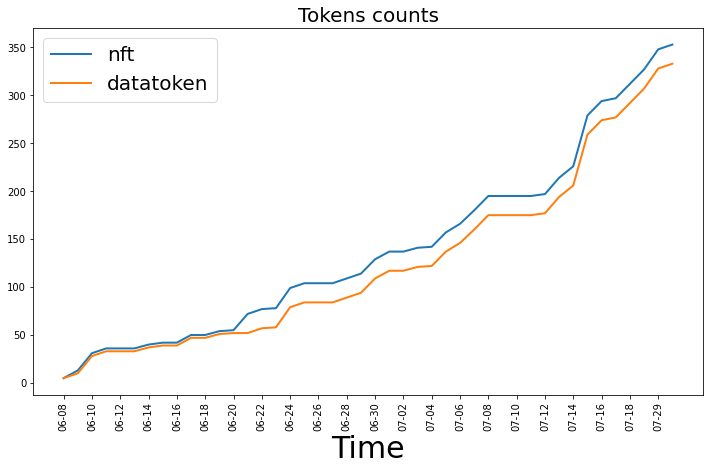

In [4]:
fig, ax = plt.subplots()
x = pd.to_datetime(df_global_statistics["timestamp"], unit='s').dt.strftime('%m-%d')

y = df_global_statistics['nftCount'].astype(float)
plt.plot(x, y, label = 'nft', linewidth=2)

y = df_global_statistics['datatokenCount']
plt.plot(x, y, label = 'datatoken', linewidth=2)


plt.xlabel("Time", fontsize=30)
# plt.ylabel("Number of tokens", fontsize=16)
plt.title(f"Tokens counts", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=20)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::2])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

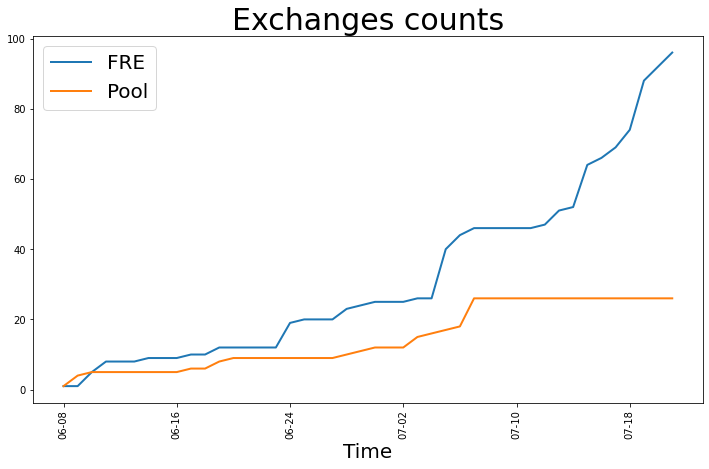

In [5]:
fig, ax = plt.subplots()
x = pd.to_datetime(df_global_statistics["timestamp"], unit='s').dt.strftime('%m-%d')

y = df_global_statistics['fixedCount'].astype(float)
plt.plot(x, y, label = 'FRE', linewidth=2)

y = df_global_statistics['poolCount']
plt.plot(x, y, label = 'Pool', linewidth=2)

plt.title(f"Exchanges counts", fontsize=30)
plt.xlabel("Time", fontsize=20)
# plt.ylabel("Number of tokens", fontsize=16)

plt.xticks(rotation=30)
plt.legend(fontsize=20)

ax.tick_params(axis='x',rotation=90)
ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

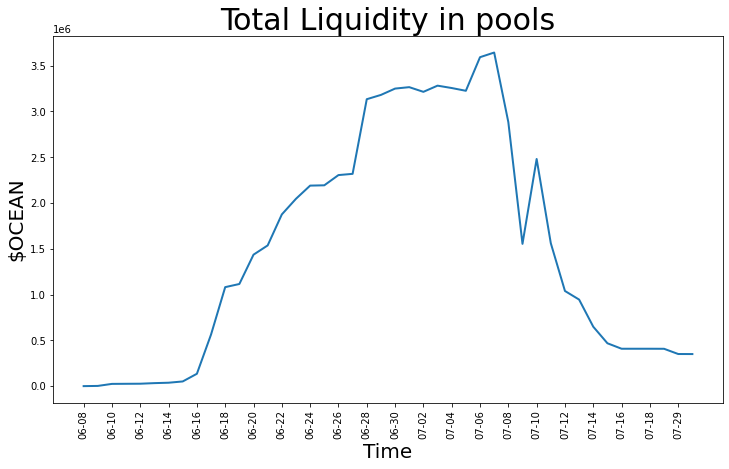

In [6]:
fig, ax = plt.subplots()
x = pd.to_datetime(df_global_statistics["timestamp"], unit='s').dt.strftime('%m-%d')

y = df_global_statistics['totalLiquidity.value'].astype(float)
plt.plot(x, y, label = 'Total Liquidity in pools', linewidth=2)

plt.title(f"Total Liquidity in pools", fontsize=30)

plt.xlabel("Time", fontsize=20)
plt.ylabel("$OCEAN", fontsize=20)
plt.xticks(rotation=30)
# plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::2])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

# Datatokens
just get list of datatokens at querying time, is it in fre, pool, dispenser, or none, this query doesn't need timestamp-block

## Query

In [7]:
# query = \
# """
# {
#   tokens (
#     where: {isDatatoken: true}
#     orderBy: createdTimestamp
#     orderDirection:asc
#     first: 1000
#   ) 
#   {
#     address
#     createdTimestamp
#     block
#     pools {
#       id
#     }
#     fixedRateExchanges {
#       id
#     }
#     dispensers {
#       id
#     }
#   }
# }
 
# """
# headers = {"Content-Type": "application/json"}
# payload = json.dumps({"query": query})
# response = requests.request("POST", url, headers=headers, data=payload)

# data = json.loads(response.text)
# df_datatokens = pd.json_normalize(data['data']['tokens'])

Clean and save

In [ ]:
# df_datatokens['fixedRateExchanges'] = df_datatokens['fixedRateExchanges'].apply(lambda y: y[0]['id'] if len(y)>0 else np.nan)
# df_datatokens['pools'] = df_datatokens['pools'].apply(lambda y: y[0]['id'] if len(y)>0 else np.nan)
# df_datatokens['dispensers'] = df_datatokens['dispensers'].apply(lambda y: y[0]['id'] if len(y)>0 else np.nan)

# df_datatokens.to_csv('./daily_data/datatokens.csv', index=False)
# df_datatokens.head()

,address,block,createdTimestamp,dispensers,fixedRateExchanges,pools
0,0xb5d8d705524a18056216bf552fa7b473f852bf48,28944565,1653897180,0x257fe2e49530a4b7fc3ed597465e2931db3f20b7-0xb...,NaN,NaN
1,0x1c5d7f3c7c760d7d47823b0f0369940c71874e95,28979255,1653972787,0x257fe2e49530a4b7fc3ed597465e2931db3f20b7-0x1...,NaN,NaN
2,0x8b57ed8dcb403125912d4e8a4c15a6d50a517df2,28985213,1653985350,NaN,0xb28ab1aade4c75f8cf013136fc0c290aeaea9ba6-0xe...,NaN
3,0xddc5acf6b81520802adbf4f24e05de7fc2cac467,29064268,1654153299,0x257fe2e49530a4b7fc3ed597465e2931db3f20b7-0xd...,NaN,NaN
4,0xd3e5af97ac3ec333d6410ff807c217b090c88e61,29294034,1654645651,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a


# Pools

In [ ]:
# df_datatokens_pools = df_datatokens.dropna(subset=['pools']).reset_index(drop=True)
# print(f'Number of datatokens which created liquidity pool: {df_datatokens_pools.shape[0]}')
# df_datatokens_pools.head()

Number of datatokens which created pool: 26


,index,address,block,createdTimestamp,fixedRateExchanges,pools
0,4,0xd3e5af97ac3ec333d6410ff807c217b090c88e61,29294034,1654645651,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a
1,5,0xbf2fac00970223da63affd7a58e6ea5f53a9bf38,29313935,1654688214,NaN,0xbae67c3f5ea82a1c9b1a5c442f5af2d8a80dbf84
2,6,0xdf71733d8d8bc83fb7caf48525716938fa2241e6,29320012,1654701647,NaN,0x2dd64ba8d9b9b1bb402aa70214e1fb1d7af314a1
3,9,0x473851e703c9e7f46e88b6552ddf8f47fd7dd460,29327479,1654717071,NaN,0xa6fe1df0e3ae0aa0d84f4beb0c626add65d971b1
4,26,0xf807ca842d8fb217fcf0a0df8e84e447358c6e86,29349611,1654764650,NaN,0x95f57249e6dd394318025068a8bfc841ac6ec0dd


Query new data

In [ ]:
# for i in range(df_datatokens_pools.shape[0]): # still query all available pools
#     pool = '"' + df_datatokens_pools['pools'][i] + '"'
#     for j in range(df_timestamp_block_origin.shape[0], df_timestamp_block.shape[0], 1): # recent timestamp-block
#         block = df_timestamp_block['block'][j]
#         timestamp = df_timestamp_block['timestamp'][j]
#         query = \
#         f"""
#             {{
#                 pool (
#                     id: {pool}
#                     block: {{
#                     number: {block}
#                     }}
#                 ) {{
#                     id
#                     baseTokenLiquidity
#                     datatokenLiquidity
#                     spotPrice
#                     swapCount
#                     joinCount
#                     exitCount
#                     transactionCount
#                     datatoken {{
#                     address
#                     name
#                     symbol
#                     orderCount
#                     holderCount
#                     nft {{
#                         creator
#                         owner
#                         name
#                         symbol
#                         transferable
                        
#                     }}
#                     }}
#                 }}
#             }}
#         """
#         headers = {"Content-Type": "application/json"}
#         payload = json.dumps({"query": query})
#         response = requests.request("POST", url, headers=headers, data=payload)

#         data = json.loads(response.text)
#         if data['data']['pool'] is not None:
#             df_data = pd.json_normalize(data['data']['pool'])
#             df_data['block'] = block
#             df_data['timestamp'] = timestamp
#         else:
#             df_data = pd.DataFrame([[np.nan]*20],columns=df_pools.columns)
#             df_data['id'] = df_datatokens_pools['pools'][i]
#             df_data['block'] = block
#             df_data['timestamp'] = timestamp
#         df_pools = pd.concat([df_pools, df_data], ignore_index=True, sort=False)
# df_pools

,baseTokenLiquidity,datatokenLiquidity,exitCount,id,joinCount,spotPrice,swapCount,transactionCount,datatoken.address,datatoken.holderCount,datatoken.name,datatoken.nft.creator,datatoken.nft.name,datatoken.nft.owner,datatoken.nft.symbol,datatoken.nft.transferable,datatoken.orderCount,datatoken.symbol,block,timestamp
0,292.02344398292613233,24230.995018928972416557,0,0x25faf893edcef3b1c94029f01a088448669fcb9a,323,0.0102077466014217030825970557789894,0,323,0xd3e5af97ac3ec333d6410ff807c217b090c88e61,0,Uxorious Seal Token,0x99840df5cb42fabe0feb8811aaa4bc99ca6c84e0,Ocean Data NFT,0x99840df5cb42fabe0feb8811aaa4bc99ca6c84e0,OCEAN-NFT,1.0,6,UXOSEA-33,31001552,1658469600
1,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28931584,1653868800
2,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28971170,1653955200
3,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29011769,1654041600
4,NaN,NaN,NaN,0x25faf893edcef3b1c94029f01a088448669fcb9a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29052216,1654128000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1348,0.068133781696625922,0.043911293957940654,0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66,1.317328082288838160151816620459896,0,66,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,0,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,2,KINANE-81,30768848,1657929600
1349,0.068133781696625922,0.043911293957940654,0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66,1.317328082288838160151816620459896,0,66,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,0,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,2,KINANE-81,30803671,1658016000
1350,0.068133781696625922,0.043911293957940654,0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66,1.317328082288838160151816620459896,0,66,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,0,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,2,KINANE-81,30841011,1658102400
1351,0.068133781696625922,0.043911293957940654,0,0x3fdc6cf954620762ecaadbc9366b8a4e0bdfd0ae,66,1.317328082288838160151816620459896,0,66,0x16d2cee4c91d4a61c234b375fb977616bcabb5c7,0,Kind Anemone Token,0xd30dd83132f2227f114db8b90f565bca2832afbd,Ocean Data NFT,0xd30dd83132f2227f114db8b90f565bca2832afbd,OCEAN-NFT,1.0,2,KINANE-81,30878163,1658188800


In [8]:
df_pools = pd.read_csv('./daily_data/old_subgraph/pools.csv')

## plots

sort pools by max liquidity

In [9]:
df_pools_sorted = pd.DataFrame(columns = ['id', 'maxLiquidity'])

for pool in df_pools['id'].unique():
    df = df_pools.loc[df_pools['id'] == pool]
    values = [{
        "id": pool,
        "maxLiquidity": df['baseTokenLiquidity'].astype(float).max()
    }]
    df_pools_sorted = df_pools_sorted.append(values)

df_pools_sorted = df_pools_sorted.sort_values('maxLiquidity', ascending=False).reset_index(drop=True)
df_pools_sorted.head(10)

,id,maxLiquidity
0,0x95f57249e6dd394318025068a8bfc841ac6ec0dd,2.120996e+06
1,0x193f1ce9108644cd4d09c769d8dcd100f2b901d6,1.607907e+06
2,0xa6fe1df0e3ae0aa0d84f4beb0c626add65d971b1,9.992493e+05
3,0x5282476fad14439cb8e66d6734a24598d3da7946,5.418177e+05
4,0x56a5cf2fb3f5b12e6c4bc4c0f100800d3735e522,3.263109e+05
5,0x569c692125cf32baf19e4ce713f9cf43e4c18c2c,9.502719e+04
6,0x1f5927cb77ea8449f0281ed14847a70d7a4f7053,4.159860e+04
7,0x800d0c1e4fb219a2d9bd2f292aa91abdcd862915,2.400787e+04
8,0xe7832a036da14dc3bbcec5f73a8193221e9f0da5,2.228288e+04
9,0x25faf893edcef3b1c94029f01a088448669fcb9a,8.235208e+03


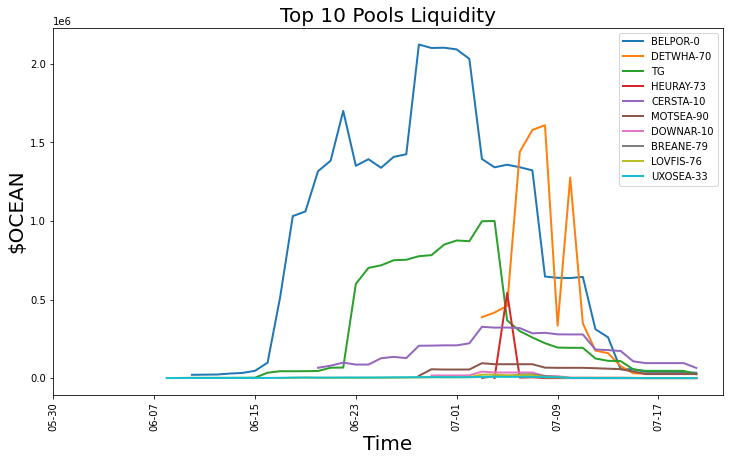

In [10]:
fig, ax = plt.subplots()
for pool in df_pools_sorted['id'][:10]:
    df = df_pools.loc[df_pools['id'] == pool]
    if df['datatoken.name'].unique()[0] is np.nan:
        datatoken_name = df['datatoken.name'].unique()[1]
    else:
        datatoken_name = df['datatoken.name'].unique()[0]

    if df['datatoken.symbol'].unique()[0] is np.nan:
        datatoken_symbol = df['datatoken.symbol'].unique()[1]
    else:
        datatoken_symbol = df['datatoken.symbol'].unique()[0]
    
    x = pd.to_datetime(df["timestamp"], unit='s').dt.strftime('%m-%d')

    y = df['baseTokenLiquidity'].astype(float)
    plt.plot(x, y, label = f'{datatoken_symbol}', linewidth=2)

plt.xlabel("Time", fontsize=20)
plt.ylabel("$OCEAN", fontsize=20)
plt.title(f"Top 10 Pools Liquidity", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

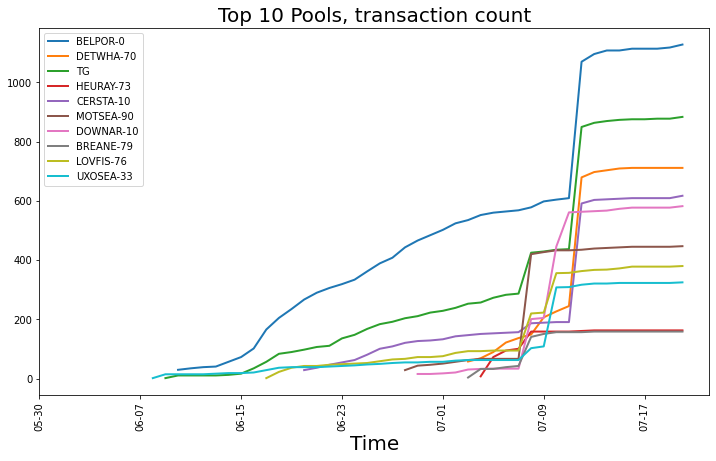

In [11]:
fig, ax = plt.subplots()
for pool in df_pools_sorted['id'][:10]:
    df = df_pools.loc[df_pools['id'] == pool]
    if df['datatoken.name'].unique()[0] is np.nan:
        datatoken_name = df['datatoken.name'].unique()[1]
    else:
        datatoken_name = df['datatoken.name'].unique()[0]

    if df['datatoken.symbol'].unique()[0] is np.nan:
        datatoken_symbol = df['datatoken.symbol'].unique()[1]
    else:
        datatoken_symbol = df['datatoken.symbol'].unique()[0]
    
    x = pd.to_datetime(df["timestamp"], unit='s').dt.strftime('%m-%d')

    y = df['transactionCount'].astype(float)
    plt.plot(x, y, label = f'{datatoken_symbol}', linewidth=2)

plt.xlabel("Time", fontsize=20)
# plt.ylabel("$OCEAN", fontsize=20)
plt.title(f"Top 10 Pools, transaction count", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

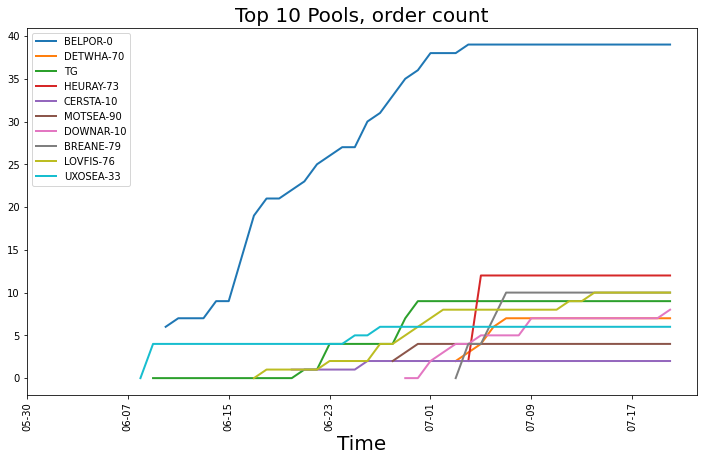

In [12]:
fig, ax = plt.subplots()
for pool in df_pools_sorted['id'][:10]:
    df = df_pools.loc[df_pools['id'] == pool]
    if df['datatoken.name'].unique()[0] is np.nan:
        datatoken_name = df['datatoken.name'].unique()[1]
    else:
        datatoken_name = df['datatoken.name'].unique()[0]

    if df['datatoken.symbol'].unique()[0] is np.nan:
        datatoken_symbol = df['datatoken.symbol'].unique()[1]
    else:
        datatoken_symbol = df['datatoken.symbol'].unique()[0]
    
    x = pd.to_datetime(df["timestamp"], unit='s').dt.strftime('%m-%d')

    y = df['datatoken.orderCount'].astype(float)
    plt.plot(x, y, label = f'{datatoken_symbol}', linewidth=2)

plt.xlabel("Time", fontsize=20)
# plt.ylabel("$OCEAN", fontsize=20)
plt.title(f"Top 10 Pools, order count", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)

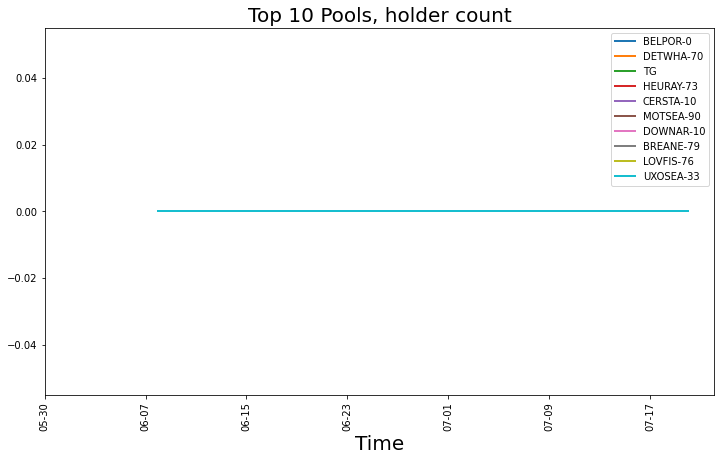

In [13]:
fig, ax = plt.subplots()
for pool in df_pools_sorted['id'][:10]:
    df = df_pools.loc[df_pools['id'] == pool]
    if df['datatoken.name'].unique()[0] is np.nan:
        datatoken_name = df['datatoken.name'].unique()[1]
    else:
        datatoken_name = df['datatoken.name'].unique()[0]

    if df['datatoken.symbol'].unique()[0] is np.nan:
        datatoken_symbol = df['datatoken.symbol'].unique()[1]
    else:
        datatoken_symbol = df['datatoken.symbol'].unique()[0]
    
    x = pd.to_datetime(df["timestamp"], unit='s').dt.strftime('%m-%d')

    y = df['datatoken.holderCount'].astype(float)
    plt.plot(x, y, label = f'{datatoken_symbol}', linewidth=2)

plt.xlabel("Time", fontsize=20)
# plt.ylabel("$OCEAN", fontsize=20)
plt.title(f"Top 10 Pools, holder count", fontsize=20)
plt.xticks(rotation=30)
plt.legend(fontsize=10)

ax.tick_params(axis='x',rotation=90)

ax.set_xticks(x[0::8])

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(12, 6.75)